<a href="https://colab.research.google.com/github/Yuvraj-Karakoti/volcanic-eruption-project/blob/main/volcanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title** =
"Analysis of Global Volcanic Eruptions "

**Project Statement ** =
To explore historical volcanic eruption records and present meaningful insights through data analysis and visualization.

**Project Description** =
This project analyzes historical volcanic eruption events across the world.  
It uses a Kaggle dataset containing eruption details such as year, country, volcano name, magnitude (VEI), and fatalities.  
The goal is to identify eruption trends, most affected countries, deadliest eruptions, and eruption frequency over time.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv('volcano-events.csv')

print(df.head())

     Year  Month  Day      Name            Location           Country  \
0     NaN    NaN  NaN       NaN                 NaN               NaN   
1 -4360.0    NaN  NaN  Macauley         Kermadec Is       New Zealand   
2 -4350.0    NaN  NaN     Kikai           Ryukyu Is             Japan   
3 -4050.0    NaN  NaN    Masaya           Nicaragua         Nicaragua   
4 -4000.0    NaN  NaN    Witori  New Britain-SW Pac  Papua New Guinea   

   Latitude  Longitude  Elevation (m)     Type  ...  Total Deaths  \
0       NaN        NaN            NaN      NaN  ...           NaN   
1   -30.210   -178.475          238.0  Caldera  ...           NaN   
2    30.793    130.305          704.0  Caldera  ...           NaN   
3    11.985    -86.165          594.0  Caldera  ...           NaN   
4    -5.576    150.516          724.0  Caldera  ...           NaN   

  Total Death Description  Total Missing  Total Missing Description  \
0                     NaN            NaN                        NaN   
1   

In [45]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                876 non-null    float64
 1   Month                               745 non-null    float64
 2   Day                                 685 non-null    float64
 3   Name                                876 non-null    object 
 4   Location                            876 non-null    object 
 5   Country                             876 non-null    object 
 6   Latitude                            876 non-null    float64
 7   Longitude                           876 non-null    float64
 8   Elevation (m)                       876 non-null    float64
 9   Type                                876 non-null    object 
 10  VEI                                 701 non-null    float64
 11  Agent                               514 non-n

In [46]:
df.shape

(877, 32)

In [47]:
if "Year" in df.columns:
    df["Year"].fillna(df["Year"].median(), inplace=True)

# Drop rows where 'Name' is missing
if "Name" in df.columns:
    df.dropna(subset=["Name"], inplace=True)



Statistical Summary:


,Year,Month,Day,Latitude,Longitude,Elevation (m),VEI,Deaths,Death Description,Missing,...,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
count,876.000000,745.000000,685.000000,876.000000,876.000000,876.000000,701.000000,440.000000,568.000000,11.000000,...,462.000000,594.000000,11.000000,14.000000,102.000000,132.000000,26.000000,265.000000,53.000000,149.000000
mean,1730.413242,6.442953,15.274453,15.083737,52.822393,1956.087900,2.864479,441.675000,1.558099,340.090909,...,722.826840,1.612795,340.909091,2.000000,488.039216,1.500000,198.078154,1.784906,1008.396226,2.208054
std,717.583467,3.350458,9.086685,25.722580,101.185489,1257.480788,1.301716,2421.846221,0.966897,642.860864,...,4137.443373,1.003319,642.391696,1.176697,3303.758879,0.860499,425.089307,0.978441,1891.905941,1.060820
min,-4360.000000,1.000000,1.000000,-63.001000,-178.475000,-642.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1799.250000,4.000000,7.000000,-6.729500,-19.666000,1117.000000,2.000000,1.000000,1.000000,2.500000,...,2.000000,1.000000,6.000000,1.000000,3.000000,1.000000,3.673000,1.000000,24.000000,1.000000
50%,1922.000000,7.000000,15.000000,13.257000,110.446000,1718.000000,3.000000,5.000000,1.000000,44.000000,...,6.000000,1.000000,44.000000,1.500000,11.000000,1.000000,19.500000,1.000000,164.000000,2.000000
75%,1986.000000,9.000000,23.000000,36.406000,130.862000,2640.250000,4.000000,48.250000,2.000000,174.500000,...,60.000000,2.000000,174.500000,3.000000,42.750000,2.000000,118.750000,3.000000,800.000000,3.000000
max,2023.000000,12.000000,31.000000,65.715000,177.180000,6377.000000,7.000000,30000.000000,4.000000,1755.000000,...,60000.000000,4.000000,1755.000000,4.000000,31943.000000,4.000000,2000.000000,4.000000,9000.000000,4.000000


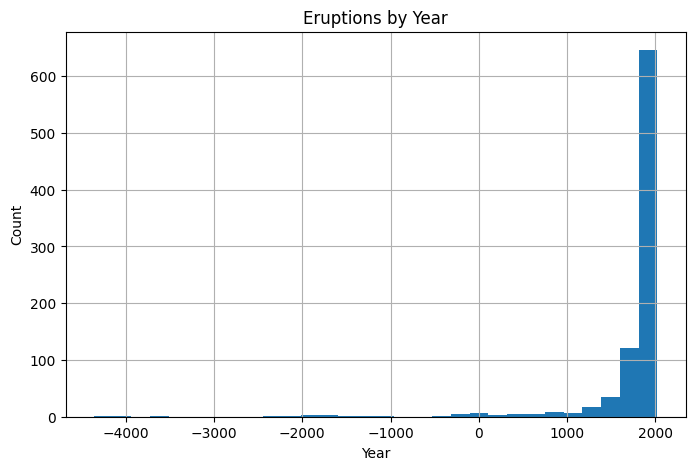

In [48]:
print("\nStatistical Summary:")
display(df.describe())

# Distribution of Year
if "Year" in df.columns:
    plt.figure(figsize=(8,5))
    df["Year"].hist(bins=30)
    plt.title("Eruptions by Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()


Corelation heatmap

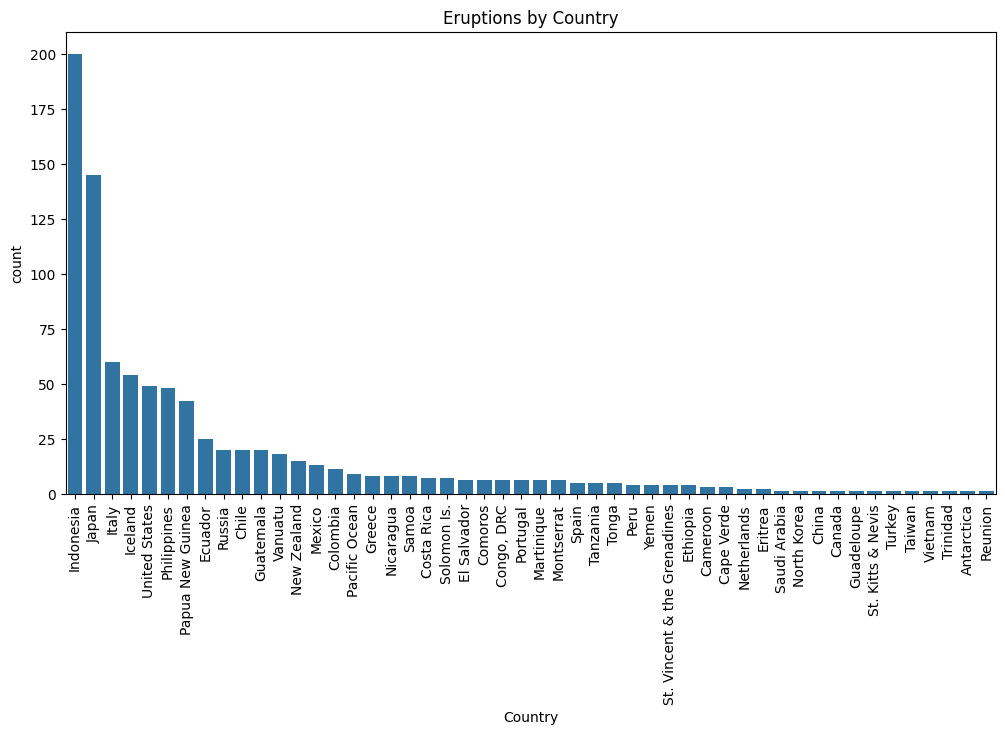

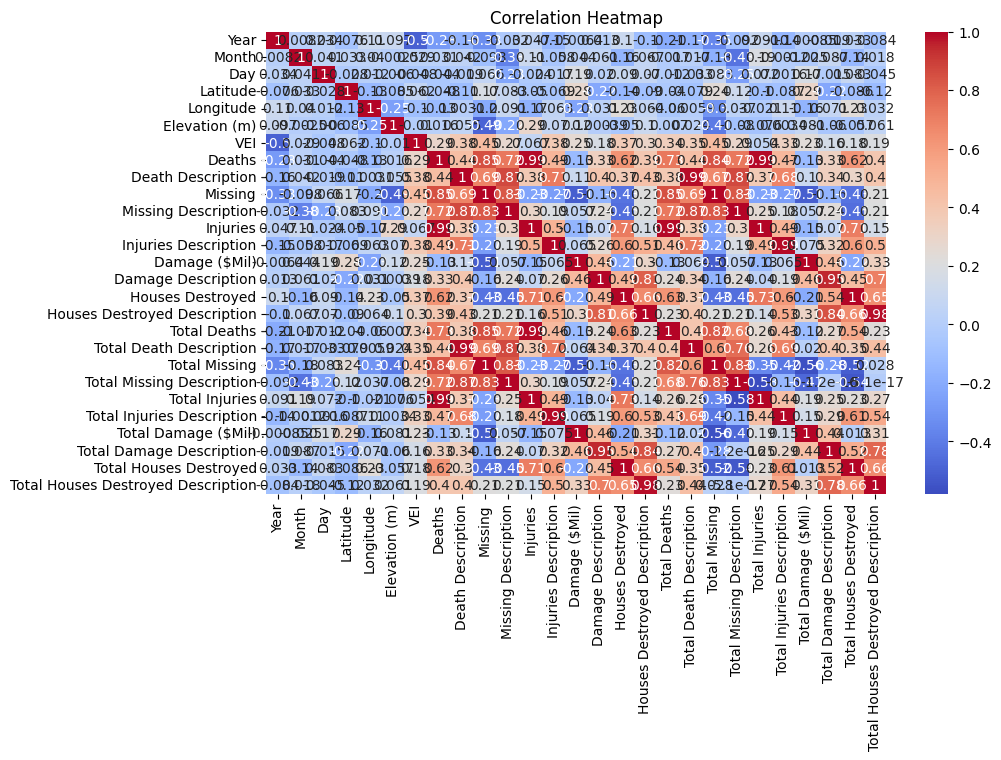

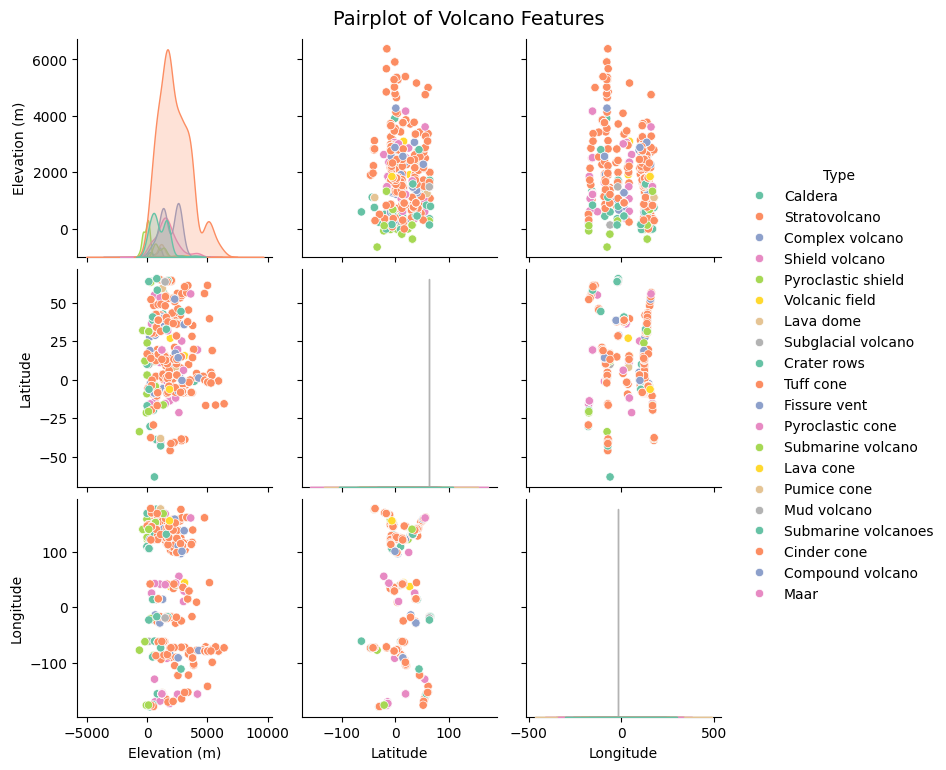

In [49]:
if "Country" in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x="Country", data=df, order=df["Country"].value_counts().index)
    plt.xticks(rotation=90)
    plt.title("Eruptions by Country")
    plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
#pair plot
sns.pairplot(
    df[['Elevation (m)', 'Latitude', 'Longitude', 'Type']].dropna(),
    diag_kind='kde',         # Gaussian KDE curves on the diagonal
    hue='Type',              # Different colors for each volcano type
    palette='Set2'           # Use a different color palette
)
plt.suptitle("Pairplot of Volcano Features", y=1.02, fontsize=14)
plt.show()


***Data preprocessing***

In [50]:
if {"Year", "Month", "Day"}.issubset(df.columns):
    df["Date"] = pd.to_datetime(df[["Year","Month","Day"]].astype(str).agg("-".join, axis=1), errors="coerce")

# Encode categorical variables (example: Country)
if "Country" in df.columns:
    le = LabelEncoder()
    df["Country_encoded"] = le.fit_transform(df["Country"])

# Scale numeric features (example: Elevation)
if "Elevation" in df.columns:
    scaler = MinMaxScaler()
    df[["Elevation_scaled"]] = scaler.fit_transform(df[["Elevation"]])

***Feature Selection***

In [51]:
if "Elevation" in df.columns:
    X = df.select_dtypes(include=[np.number]).drop(columns=["Elevation"])  # features
    y = df["Elevation"]  # target

    # Filter method: ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=5)
    X_new = selector.fit_transform(X.fillna(0), y)

    print("\nTop 5 Features (ANOVA F-test):")
    selected_features = X.columns[selector.get_support()]
    print(selected_features.tolist())

    rf = RandomForestClassifier(random_state=42)

    y_class = (y > y.median()).astype(int)
    rf.fit(X.fillna(0), y_class)

    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nRandom Forest Feature Importance (Classification):")
    print(feature_importances)

    plt.figure(figsize=(8,5))
    feature_importances.head(10).plot(kind="barh")
    plt.title("Top Feature Importances (Random Forest)")
    plt.show()


***Model Training & Evaluation***

In [52]:
if "Elevation" in df.columns and {"Year","Latitude","Longitude"}.issubset(df.columns):
    X = df[["Year","Latitude","Longitude"]].fillna(0)
    y = df["Elevation"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)

    print("\nRandom Forest Regressor Results:")
    print("Training R^2 Score:", rf_reg.score(X_train, y_train))
    print("Test R^2 Score:", rf_reg.score(X_test, y_test))


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 1 to 876
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Year                                876 non-null    float64       
 1   Month                               745 non-null    float64       
 2   Day                                 685 non-null    float64       
 3   Name                                876 non-null    object        
 4   Location                            876 non-null    object        
 5   Country                             876 non-null    object        
 6   Latitude                            876 non-null    float64       
 7   Longitude                           876 non-null    float64       
 8   Elevation (m)                       876 non-null    float64       
 9   Type                                876 non-null    object        
 10  VEI                            

***Model training***

LinearRegression → predicts a continuous numerical target.

RandomForestRegressor → predicts a continuous numerical target using an ensemble of decision trees.


In [54]:
# Features and target
X = df[["Year","Latitude","Longitude"]].fillna(0)
y = df["Elevation (m)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [56]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)  # R² score
    cv_score = np.mean(cross_val_score(model, X, y, cv=5))
    print(f"{name}: Test R² = {score:.3f}, CV R² = {cv_score:.3f}")

Linear Regression: Test R² = 0.159, CV R² = -0.176
Random Forest: Test R² = 0.822, CV R² = 0.753


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.6022727272727273
Classification Report:
               precision    recall  f1-score   support

      -360.0       1.00      1.00      1.00         3
        -5.0       1.00      1.00      1.00         2
        -2.0       0.00      0.00      0.00         1
        75.0       0.00      0.00      0.00         1
       140.0       0.00      0.00      0.00         1
       155.0       0.67      1.00      0.80         4
       212.0       0.00      0.00      0.00         1
       311.0       1.00      1.00      1.00         2
       361.0       0.67      1.00      0.80         2
       394.0       1.00      1.00      1.00         1
       408.0       0.00      0.00      0.00         1
       450.0       0.00      0.00      0.00         0
       458.0       0.00      0.00      0.00         1
       470.0       0.00      0.00      0.00         1
       485.0       0.00      0.00    

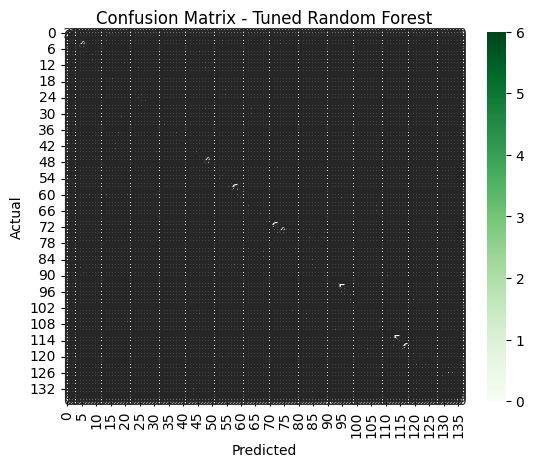

In [57]:
# --- Model Tuning and Optimization (Random Forest) ---

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

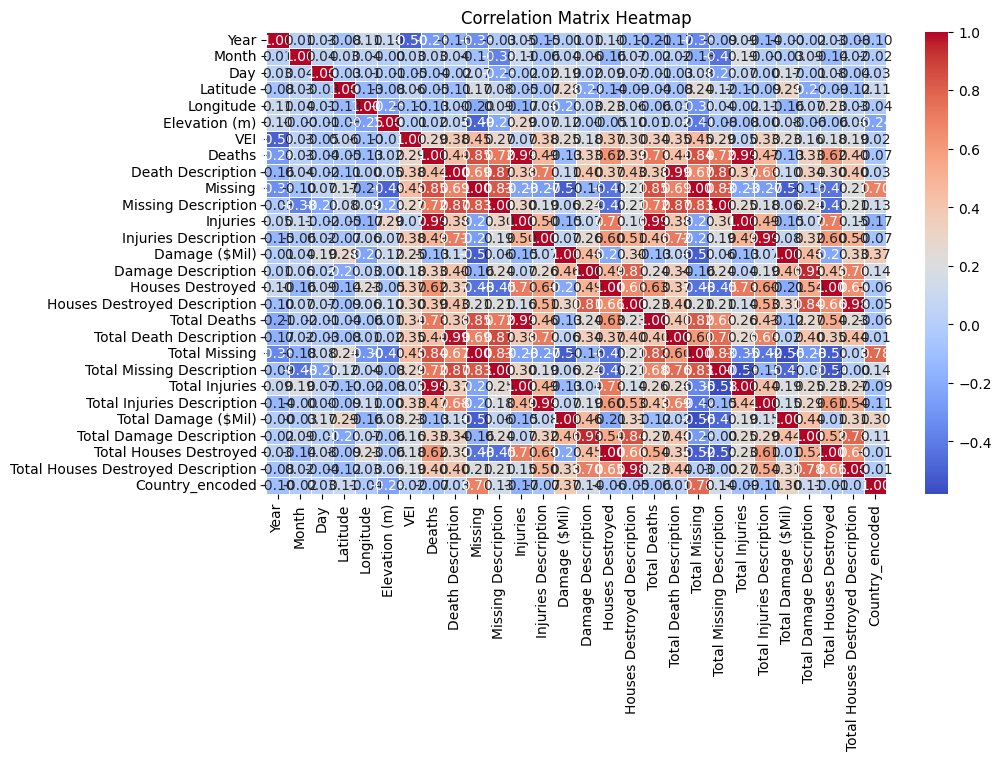

In [58]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [59]:
y_pred = model.predict(X_test)

# Check if it's a classification model
if hasattr(model, "predict_proba") or hasattr(model, "classes_"):
    print("Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
else:
    print("Regression Metrics:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))

# ------------------------
# Saving  the final model
# ------------------------
joblib.dump(model, "final_model.pkl")
print("Model saved as 'final_model.pkl'")

Regression Metrics:
MSE: 311835.1319232955
RMSE: 558.4220016468688
R2 Score: 0.8220964409225762
Model saved as 'final_model.pkl'
